In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
from src.classifier import Classifier
from src_llm_icl.few_shot_examples import (
    sequential_prompt,
    instruct_prompt,
    EXAMPLES_SEQUENTIAL,
    EXAMPLES_INSTRUCT,
)

FileNotFoundError: [Errno 2] No such file or directory: '../data/traindata.csv'

In [3]:
train_filename = "data/traindata.csv"
dev_filename = "data/devdata.csv"

df_train = pd.read_csv(train_filename, header=None, sep="\t")
df_dev = pd.read_csv(dev_filename, header=None, sep="\t")

df_train

,0,1,2,3,4
0,positive,AMBIENCE#GENERAL,seating,18:25,short and sweet – seating is great:it's romant...
1,positive,AMBIENCE#GENERAL,trattoria,25:34,This quaint and romantic trattoria is at the t...
2,positive,FOOD#QUALITY,food,98:102,The have over 100 different beers to offer thi...
3,negative,SERVICE#GENERAL,STAFF,5:10,THIS STAFF SHOULD BE FIRED.
4,positive,FOOD#STYLE_OPTIONS,menu,4:8,"The menu looked great, and the waiter was very..."
...,...,...,...,...,...
1498,positive,DRINKS#QUALITY,expresso,29:37,One of us actually liked the expresso - that's...
1499,negative,SERVICE#GENERAL,waitress,20:28,The hostess and the waitress were incredibly r...
1500,positive,RESTAURANT#PRICES,place,12:17,this little place has a cute interior decor an...
1501,positive,RESTAURANT#GENERAL,restaurant,30:40,Nice Family owned traditional restaurant.


In [8]:
df_train.columns = ["sentiment", "aspect", "item", "position", "sentence"]
df_dev.columns = ["sentiment", "aspect", "item", "position", "sentence"]

In [17]:
df_train[["aspect", "item", "position", "sentence"]].iloc[0].values

array(['AMBIENCE#GENERAL', 'seating', '18:25',
       "short and sweet – seating is great:it's romantic,cozy and private."],
      dtype=object)

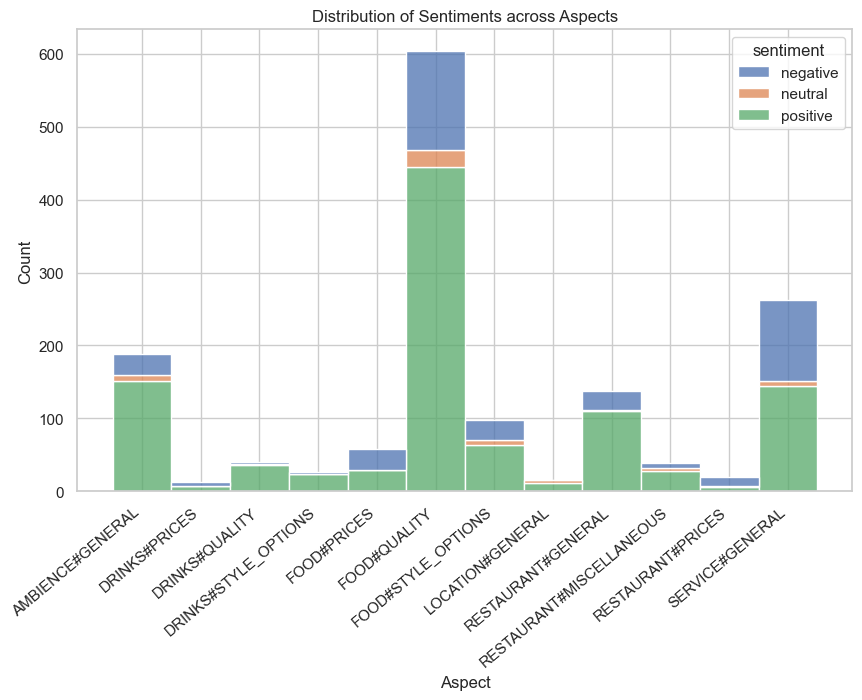

In [ ]:
df_grouped = df_train.groupby(["aspect", "sentiment"]).agg("count").reset_index()
df_grouped = df_grouped[["aspect", "sentiment", "sentence"]]
df_grouped.columns = ["aspect", "sentiment", "count"]


# Plotting the distribution of the dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(
    data=df_grouped, x="aspect", hue="sentiment", weights="count", multiple="stack"
)
plt.title("Distribution of Sentiments across Aspects")
plt.xlabel("Aspect")
plt.ylabel("Count")
plt.xticks(rotation=40, ha="right")
plt.show()

In [ ]:
instruct_prompt(*df_train[["item", "position", "aspect", "sentence"]].iloc[0].values)

'What is the sentiment of the word "seating" at position "18:25" (regarding the criteria "AMBIENCE#GENERAL") in the sentence: "short and sweet – seating is great:it\'s romantic,cozy and private."?\n            Please return just one word: "positive", "negative" or "neutral".\n            '

In [23]:
EXAMPLES_INSTRUCT

['What is the sentiment of the word "seating" at position "18:25" (regarding the criteria "AMBIENCE#GENERAL") in the sentence: "short and sweet – seating is great:it\'s romantic,cozy and private."?\n            Please return just one word: "positive", "negative" or "neutral".\n            \nOUTPUT : positive']

In [ ]:
classifier = Classifier(ollama_url="http://localhost:11434")
predictions = classifier.predict(dev_filename, device=None)
print(predictions)